In [62]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [63]:
files = os.listdir("../raw/results/comparison")

In [64]:
base_address = "../raw/results/comparison/"
df = pd.DataFrame()
for file in files:
    series = pd.read_csv(f"{base_address}{file}", header=None)[2]
    df[file.split(".")[0]] = series

In [65]:
df.head()

,MAR-325__train_f1,MAR-330__train_f1,MAR-335__train_f1,MAR-329__train_f1,MAR-332__train_f1,MAR-324__train_f1,MAR-336__train_f1,MAR-338__train_f1,MAR-333__train_f1,MAR-337__train_f1,MAR-328__train_f1,MAR-327__train_f1,MAR-326__train_f1,MAR-339__train_f1,MAR-331__train_f1
0,0.490476,0.377778,0.355556,0.281481,0.323810,0.314815,0.361905,0.277778,0.488889,0.433333,0.206349,0.250000,0.301587,0.206349,0.228571
1,0.340476,0.335185,0.422222,0.251462,0.298990,0.162963,0.367521,0.270677,0.308772,0.358974,0.309524,0.343434,0.335185,0.254545,0.257631
2,0.347034,0.312169,0.368132,0.361111,0.246753,0.233446,0.324045,0.249084,0.279202,0.308378,0.329966,0.305263,0.225885,0.344444,0.244444
3,0.294613,0.334637,0.370370,0.306607,0.281481,0.287347,0.296667,0.240594,0.249455,0.304598,0.390152,0.280864,0.288889,0.374253,0.262951
4,0.272875,0.324786,0.360914,0.361111,0.273148,0.317629,0.345679,0.282187,0.230700,0.323082,0.372685,0.270833,0.250204,0.335673,0.349464


In [47]:
df.columns

Index(['MAR-325__train_f1', 'MAR-330__train_f1', 'MAR-335__train_f1',
       'MAR-329__train_f1', 'MAR-332__train_f1', 'MAR-324__train_f1',
       'MAR-336__train_f1', 'MAR-338__train_f1', 'MAR-333__train_f1',
       'MAR-337__train_f1', 'MAR-328__train_f1', 'MAR-327__train_f1',
       'MAR-326__train_f1', 'MAR-339__train_f1', 'MAR-331__train_f1'],
      dtype='object')

In [48]:
CA_cols = ["MAR-329__train_f1", "MAR-330__train_f1", "MAR-331__train_f1", "MAR-332__train_f1", "MAR-333__train_f1"]
CUA_cols = ["MAR-324__train_f1", "MAR-325__train_f1", "MAR-326__train_f1", "MAR-327__train_f1", "MAR-328__train_f1"]
TCA_cols = ["MAR-339__train_f1", "MAR-335__train_f1", "MAR-336__train_f1", "MAR-337__train_f1", "MAR-338__train_f1"]
# Calculate the average, min, and max
df['CA_Average'] = df[CA_cols].mean(axis=1).ewm(span=500, adjust=False).mean()
df['CA_Min'] = df[CA_cols].min(axis=1).ewm(span=500, adjust=False).mean()
df['CA_Max'] = df[CA_cols].max(axis=1).ewm(span=500, adjust=False).mean()
# Calculate the average, min, and max
df['CUA_Average'] = df[CUA_cols].mean(axis=1).ewm(span=500, adjust=False).mean()
df['CUA_Min'] = df[CUA_cols].min(axis=1).ewm(span=500, adjust=False).mean()
df['CUA_Max'] = df[CUA_cols].max(axis=1).ewm(span=500, adjust=False).mean()
# Calculate the average, min, and max
df['TCA_Average'] = df[TCA_cols].mean(axis=1).ewm(span=500, adjust=False).mean()
df['TCA_Min'] = df[TCA_cols].min(axis=1).ewm(span=500, adjust=False).mean()
df['TCA_Max'] = df[TCA_cols].max(axis=1).ewm(span=500, adjust=False).mean()

In [49]:
def tuftefy(ax):
    """Remove spines and tick position markers to reduce ink."""
    # 
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(True)
    ax.spines["bottom"].set_color('grey')

    ax.grid(color="w", alpha=0.5)
    ax.get_yaxis().grid(True)
    ax.get_xaxis().grid(False)

In [60]:
plt_df = df.iloc[:5000]
plt_df = plt_df * 100

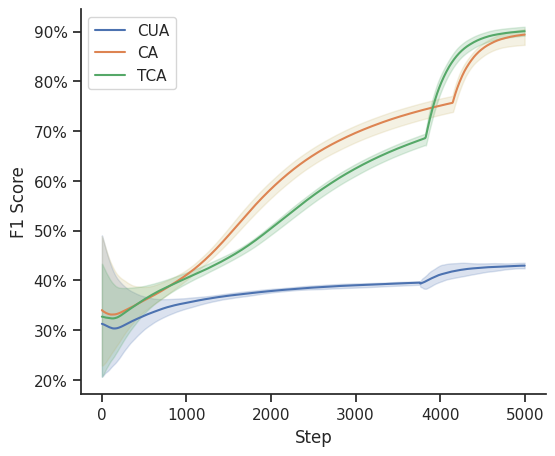

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Function to format the ticks with a percent sign
def percent_formatter(x, pos):
    return f'{x:.0f}%'

plt.figure(figsize=(6, 5))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.lineplot(data=plt_df, x=plt_df.index, y='CUA_Average', label='CUA')
plt.fill_between(plt_df.index, plt_df['CUA_Min'], plt_df['CUA_Max'], color='b', alpha=0.2)
sns.lineplot(data=plt_df, x=plt_df.index, y='CA_Average', label='CA')
plt.fill_between(plt_df.index, plt_df['CA_Min'], plt_df['CA_Max'], color='y', alpha=0.2)
sns.lineplot(data=plt_df, x=plt_df.index, y='TCA_Average', label='TCA')
plt.fill_between(plt_df.index, plt_df['TCA_Min'], plt_df['TCA_Max'], color='g', alpha=0.2)
plt.xlabel('Step')
plt.ylabel('F1 Score')

# Apply the percent formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(percent_formatter))

plt.legend()
plt.savefig('f1_score_plot.png', dpi=300, bbox_inches='tight')
plt.show()


In [66]:
files = os.listdir("../raw/results/frozen")
base_address = "../raw/results/frozen/"
df = pd.DataFrame()
for file in files:
    series = pd.read_csv(f"{base_address}{file}", header=None)[2]
    df[file.split(".")[0]] = series

In [67]:
df

,MAR-359__train_f1,MAR-329__train_f1,MAR-360__train_f1,MAR-357__train_f1
0,0.488889,0.281481,0.259259,0.490476
1,0.344444,0.251462,0.278846,0.335434
2,0.291866,0.361111,0.290196,0.366779
3,0.356683,0.306607,0.258333,0.322440
4,0.349091,0.361111,0.289988,0.331986
...,...,...,...,...
7557,0.922344,0.908974,0.923723,0.920440
7558,0.922331,0.908996,0.923711,0.920460
7559,0.922284,0.908988,0.923698,0.920482
7560,0.922304,0.908939,0.923687,0.920503


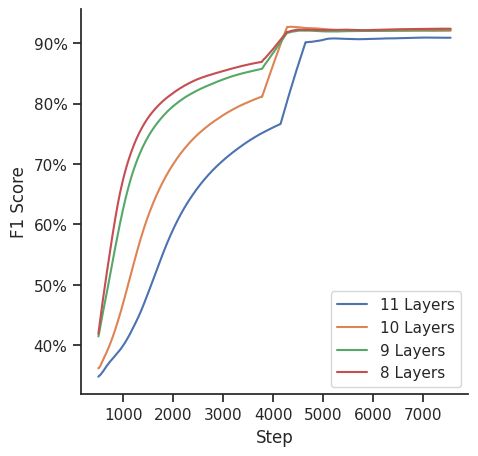

In [86]:
plt.figure(figsize=(5, 5))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.lineplot(data=df, x=df.index, y=df['MAR-329__train_f1'].rolling(500).mean() * 100, label='11 Layers')
sns.lineplot(data=df, x=df.index, y=df['MAR-357__train_f1'].rolling(500).mean() * 100, label='10 Layers')
sns.lineplot(data=df, x=df.index, y=df['MAR-359__train_f1'].rolling(500).mean() * 100, label='9 Layers')
sns.lineplot(data=df, x=df.index, y=df['MAR-360__train_f1'].rolling(500).mean() * 100, label='8 Layers')
# plt.fill_between(plt_df.index, plt_df['CUA_Min'], plt_df['CUA_Max'], color='b', alpha=0.2)
plt.xlabel('Step')
plt.ylabel('F1 Score')

# Apply the percent formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(percent_formatter))

plt.legend()
plt.savefig('f1_score_plot_frozen.png', dpi=200, bbox_inches='tight')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


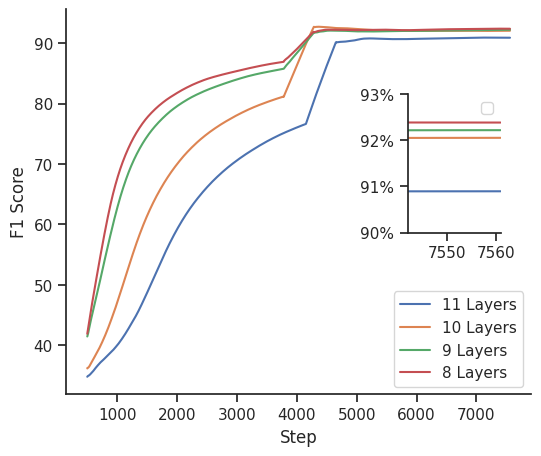

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Assuming df is your DataFrame and percent_formatter is defined
plt.figure(figsize=(6, 5))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

# Plotting the lines
sns.lineplot(data=df, x=df.index, y=df['MAR-329__train_f1'].rolling(500).mean() * 100, label='11 Layers')
sns.lineplot(data=df, x=df.index, y=df['MAR-357__train_f1'].rolling(500).mean() * 100, label='10 Layers')
sns.lineplot(data=df, x=df.index, y=df['MAR-359__train_f1'].rolling(500).mean() * 100, label='9 Layers')
sns.lineplot(data=df, x=df.index, y=df['MAR-360__train_f1'].rolling(500).mean() * 100, label='8 Layers')

# Adding the inset
ax = plt.gca()
plt.xlabel('Step')
plt.ylabel('F1 Score')
ax_inset = inset_axes(ax, width="20%", height="30%", loc='center right', bbox_to_anchor=(0, 0, 1, 1.2), bbox_transform=ax.transAxes, borderpad=2)
# tuftefy(ax)

# Plotting the same lines in the inset
sns.lineplot(data=df, x=df.index, y=df['MAR-329__train_f1'].rolling(500).mean() * 100, ax=ax_inset)
sns.lineplot(data=df, x=df.index, y=df['MAR-357__train_f1'].rolling(500).mean() * 100, ax=ax_inset)
sns.lineplot(data=df, x=df.index, y=df['MAR-359__train_f1'].rolling(500).mean() * 100, ax=ax_inset)
sns.lineplot(data=df, x=df.index, y=df['MAR-360__train_f1'].rolling(500).mean() * 100, ax=ax_inset)

# Setting the limits for the inset
ax_inset.set_xlim(df.index[-20], df.index[-1])
ax_inset.set_ylim(90, 93)  # Adjust these limits based on your data
plt.xlabel(None)
plt.ylabel(None)
# Adding annotations for the final values with offsets
final_values = {
    '11 Layers': df['MAR-329__train_f1'].rolling(500).mean().iloc[-1] * 100,
    '10 Layers': df['MAR-357__train_f1'].rolling(500).mean().iloc[-1] * 100,
    '9 Layers': df['MAR-359__train_f1'].rolling(500).mean().iloc[-1] * 100,
    '8 Layers': df['MAR-360__train_f1'].rolling(500).mean().iloc[-1] * 100
}

offsets = {
    '11 Layers': (0, 1),
    '10 Layers': (0, -1),
    '9 Layers': (0, 2),
    '8 Layers': (0, -2)
}

# ax_inset.label(None)

# for label, value in final_values.items():
#     ax_inset.text(df.index[-1], value + offsets[label][1], f'{value:.2f}%', horizontalalignment='left')

# Apply the percent formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(percent_formatter))

plt.legend()
plt.savefig('f1_score_plot_frozen.png', dpi=200, bbox_inches='tight')
plt.show()
